# Bike Sharing Trends
The goal of this session is to predict the count of bike rental demand. To this end, we use bike sharing dataset with **weather information**.
For more information please read the [data documentation](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data).


# Import required libraries

pandas and numpy are used to perform data manipulation and related tasks.
pandas is used to analyze and visualize data, and to perform some queries on data.

In [ ]:
import pandas as pd
import numpy as np

# Read bike sharing dataset

**Load the bike_sharing_hour.csv and check the shape of the loaded dataframe.**
* A simple way to store and load big data sets is to use CSV files (comma separated files).
* Use **read_csv()** function from pandas to load the CSV into a DataFrame
* Print data size (The shape of an array is the number of elements in each dimension.)

In [ ]:
bike_data = pd.read_csv('Data.csv')
print("Bike sharing data size: ", bike_data.shape)

Bike sharing data size:  (17379, 17)


* Dataset contains 17k+ samples with 17 attributes.

# Display samples of bike sharing dataset

* **Check the top few rows to see how the data looks.**

* **Use the head(n=5) utility from pandas**

head(n) returns the first n rows.

In [ ]:
# display data frames as tables
bike_data.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Display statistical summary of data



**describe ()** is a descriptive statistics summarizing the central tendency, dispersion and shape of a dataset’s distribution.

In [ ]:
# dataset summary stats
bike_data.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Check data types

In [ ]:
#  check the data types of all attributes
print(bike_data.dtypes)

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object


* 17k+ samples   
* 17 feautres
* **Normalized features** (continuous features): temp, atemp, hum(humidity), windspeed
* **Categorical features**: season, year, month, hour, is_holiday, weekday, is_workingday, weather_condition, casual, registered, total_count


# Exploratory Data Analysis (EDA)


Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* **Visualize hourly ridership counts across the seasons.**
* Use point plots for focusing comparisons between different levels of one or more categorical variables.
* **data**: specifies the pandas DataFrame we want to use.
* **x**: represents the categorical column label
* **y**: represents the column that we want to aggregate data for
*  **hue**: allows you to split a categorical variable into additional groups, (splitting the variable into relevant groups).

Hourly distribution of Total Counts Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter

Text(0.5, 1.0, 'Season wise hourly distribution of counts')

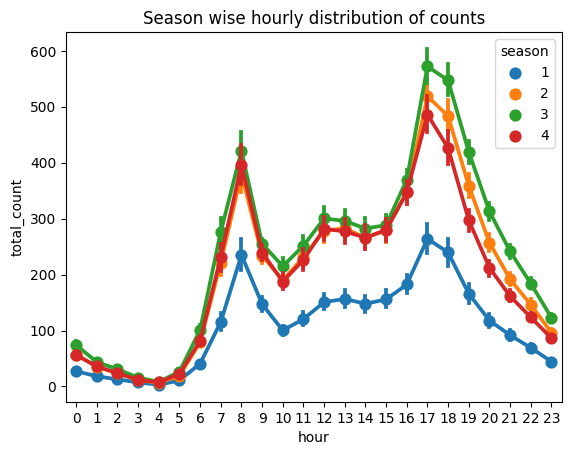

In [ ]:
sns.pointplot(data = bike_data, x = 'hour', y = 'total_count', hue = 'season')
# add a title
plt.title('Season wise hourly distribution of counts')

* The above plot shows similar trends for all seasons with counts peaking in the morning between 7-9 am and in the evening between 4-6 pm, possibly due to high movement during start and end of office hours.

* The counts are lowest for the spring season, while fall sees highest riders across all 24 hours.

**Visualize hourly ridership counts across the weekday using ponitplot()**

Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')

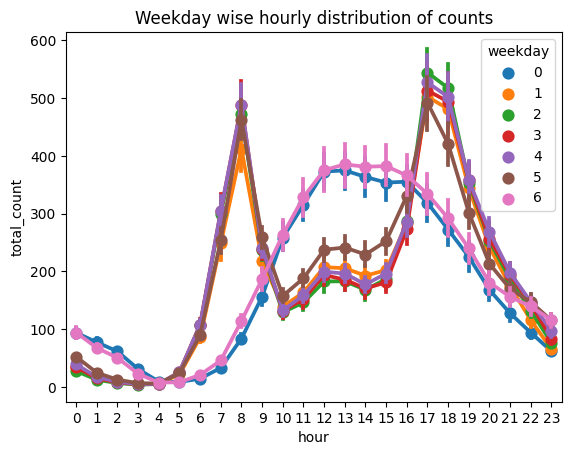

In [ ]:
sns.pointplot(data = bike_data, x = 'hour', y = 'total_count', hue = 'weekday')
# add a title
plt.title('Weekday wise hourly distribution of counts')

* Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours
* Weekdays have higher usage as compared to weekends
* Weekdays see higher usage during mornings and
evenings.

# Outliers

While exploring and learning about any dataset, it is imperative that we check for extreme and unlikely values.

Though we handle missing and incorrect information while preprocessing the dataset, outliers are usually caught during EDA.

Outliers can severely and adversely impact the downstream steps like modeling and the results.

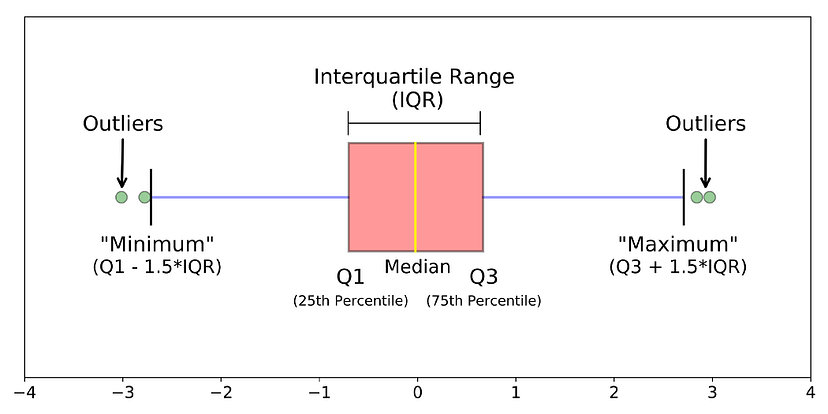

* Analyze outliers for numeric attributes like temperature, humidity and windspeed
* Use boxplots to check for outliers in the data

The seaborn's boxplot is a very basic plot. Boxplots are used to visualize distributions.

<Axes: >

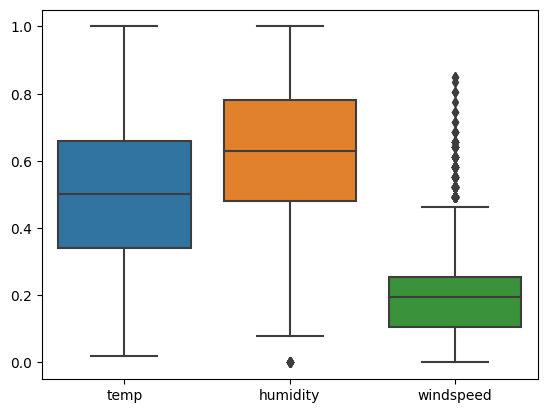

In [ ]:
sns.boxplot(data= bike_data[['temp', 'humidity', 'windspeed']])

For weather attributes of temperature, humidity, and wind speed, we find outliers only in the case of windspeed.

**Remove outliers using IQR technique**
* Use numpy' **percentile()** function to compute the nth percentile of the given data along the specified axis.
* Use numpy's **where()** function to return sample indexes dependening on specific conditions
* Remove outliers by using pandas' **drop()** finction

drop() removes rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.

In [ ]:
total_samples = bike_data.shape[0]
print("Number of samples:", total_samples)

Q1 , Q3 = np.percentile( bike_data['windspeed'], [25,75])
IQR = Q3 - Q1
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR

sampl_idx = np.array(np.where(bike_data['windspeed'] < min)).ravel()
bike_data.drop( sampl_idx, axis=0, inplace=True)

sampl_idx = np.array(np.where(bike_data['windspeed'] > max)).ravel()
bike_data.drop( sampl_idx, axis=0, inplace=True)

num_outliers = total_samples - bike_data.shape[0]
print("Number of samples after removing outliers: ", bike_data.shape[0])
print("Number of outliers:", num_outliers)

Number of samples: 17379
Number of samples after removing outliers:  17037
Number of outliers: 342


** Check outliers at different granularity levels like hourly.**

Text(0.5, 1.0, 'Box Polt for hourly distribution of counts')

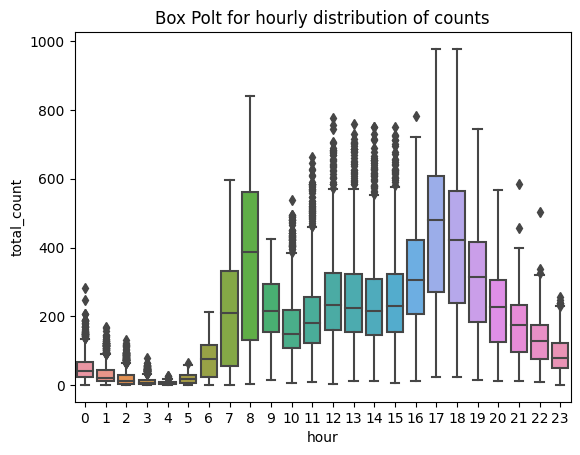

In [ ]:
sns.boxplot(data = bike_data, x='hour', y='total_count')
#add a title
plt.title("Box Polt for hourly distribution of counts")

* Early hours (0-4) and late nights (21-23) have low counts but significant outliers
* Afternoon hours also have outliers
* Peak hours have higher medians and overall counts with virtually no outliers

# Monthly distribution of Total Counts

**Visualize monthly ridership trends using seaborn’s barplot().**

barplot() Creates Bar Charts. A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

* A bar chart is a chart or graph that represents **numerical** measures (such as counts) broken out by a **categorical** variable.
* **data**: specifies the pandas DataFrame we want to use.
* **x**: represents the categorical column label
* **y**: represents the column that we want to aggregate data for
*  **hue**: allows you to split a categorical variable into additional groups, (splitting the variable into relevant groups).

Text(0.5, 1.0, 'Monthly distribution of counts')

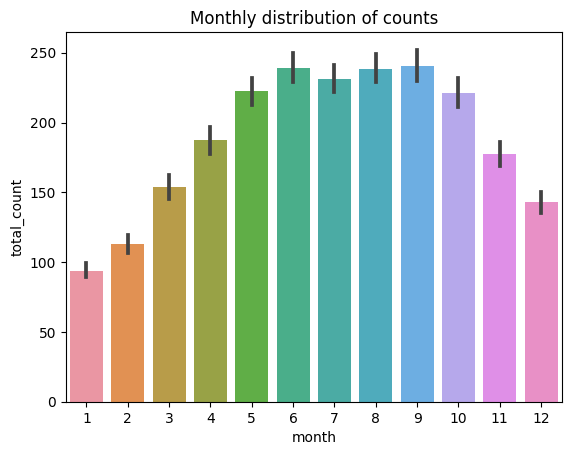

In [ ]:
sns.barplot(data = bike_data, x = 'month', y= 'total_count')
# add a title
plt.title('Monthly distribution of counts')

* The months June-September see highest ridership.

* Fall is a good season for Bike Sharing programs.

# Year Wise Count Distributions

A violin plot is similar to a box plot in that it shows a visual representation of the data distribution. This plot allows you to see the distribution of quantitative data, split by one or more categorical variables

Violin plots visualize inter-quartile range and other summary statistics like mean/median.

The key components of the violin plot:
* The white dot in the center of the plot shows the median of the distribution.
* The thicker black bar shows the interquartile range of the data.
* The thinner black bar shows the data that extends to 1.5 times the interquartile range.
* The wider the plot is on a given data point, the more likely a point will fall into the range

<Axes: xlabel='year', ylabel='total_count'>

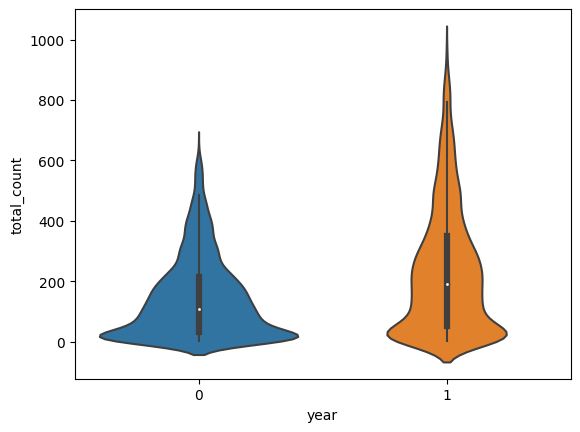

In [ ]:
sns.violinplot(data=bike_data, x='year',y='total_count')

* Both years have multimodal distributions.
* 2011 has lower counts overall with a lower median.
* 2012 has a higher max count though the peaks are around between 100-200 rides.

# Working Day Vs Holiday Distribution

* **Check the impact of working day and holiday on requesting bike riding by using barplot()**
* subplot() function draws multiple plots in one figure
* figure() creates a new figure, or activate an existing figure.

<Axes: xlabel='is_workingday', ylabel='total_count'>

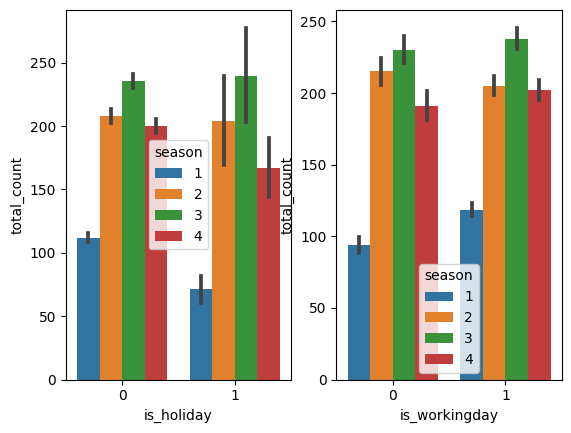

In [ ]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.barplot(data = bike_data, x='is_holiday', y='total_count', hue='season')
plt.subplot(1,2,2)
sns.barplot(data = bike_data, x='is_workingday', y='total_count', hue='season')

* There is more demand for bike sharing on working days.
* There is more demand for Fall.

# Correlations between attributes

Correlation helps us understand relationships between different attributes of the data. Correlations can help us understand and exploit data relationships to build better models.

* **Prepare a correlational matrix using the pandas utility function of corr()**.
* **Use seaborns's heatmap() function to plot the correlation matrix**.

A heatmap is a plot of rectangular data as a color-encoded matrix.  It can show the relation between variabels.

Important Parameters:
* **data**: refers to the Pandas DataFrame to use
* **vmin, vmax**: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
* **cmap**: allows you to customize the colormap used in the visualization
* **annot**: If True, write the data value in each cell.
* **square**: allows you to create square values in the heatmap

<Axes: >

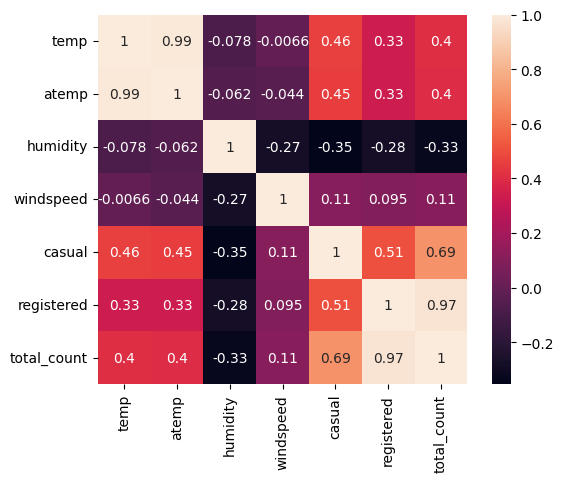

In [ ]:
# calculates correlations between temp, atemp, humidity, windspeed
corrMatt = bike_data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']].corr()
sns.heatmap(corrMatt, square=True, annot=True)

* Correlation between temp and atemp is very high (as expected)
* The two count variables, registered and casual, show obvious strong correlation to total_count.
* wind_speed and humidity have slight negative correlation.
* Overall, none of the attributes show high correlational statistics.

# Regression Analysis

 Regression is the process of investigating relationships between target and independent variables. Regression is referred to estimation of continuous response/target variables as opposed to classification, which estimates discrete targets.

 For each data point **residual**: e_i = y_i - f(x_i , b)

# Normality Test (Q-Q  plot)

Normality test is a visual/graphical test to check for normality of the data. This test helps us identify outliers, skewness, and so on. The test is performed by plotting the data verses theoretical quartiles.

A Q-Q plot, short for “quantile-quantile” plot, is often used to assess whether or not a set of data potentially came from some theoretical distribution. In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution

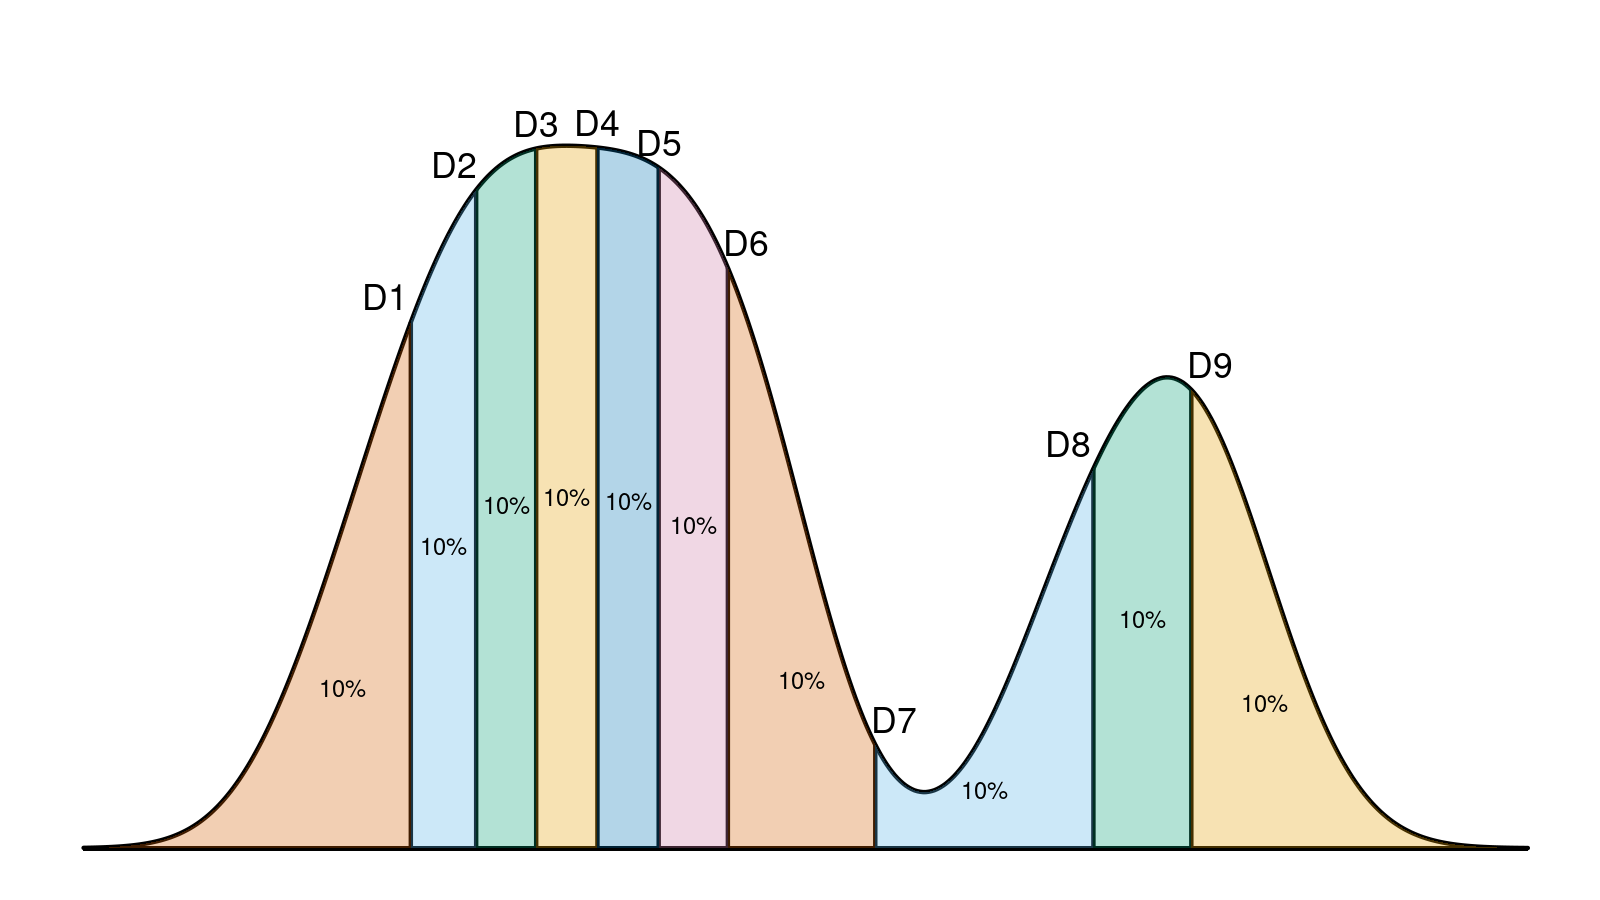

* Use scipy.stats' **probplot()** function to visulaize Q-Q plot
* The key components of probplot() are as:
  * **data**: 1-dimmensional data
  * **dist**:  a scipy.stats or statsmodels distribution. The default is norm (a standard normal).

The module of scipy.stats contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

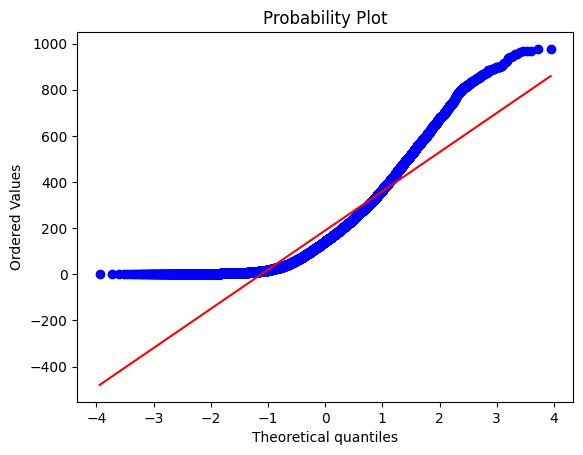

In [ ]:
import scipy.stats as stats
stats.probplot(bike_data['total_count'], dist='norm', plot=plt)
plt.show()

Any deviation from the straight line in normal plot shows that the data does not pass the normality test.

#  R-Squared: Goodness of Fit
R-Squared is another measure used to check for goodness of fit for regression analysis. It is a measure used to determine if the regression line is able to indicate the variance in target variable as explained by the independent variabls. R-squared is a numeric value between 0 and 1, with 1 pointing to the fact that the independent variable(s) are able to explain the variance in target variable. Values closer to 0 are indicative of poor fitting models.

# Model evaluation
The dataset is usually divided at hand into training and testing sets to evaluate the performance of the models.

* Use scikit-learn’s **train_test_split()** function available through model_selection module.
  * **X**: data matrix
  * **y**: class label vector
  * **test_size**: represent the proportion of the dataset to include in the test split
  *  **stratify**:  data is split in a stratified fashion (reserving the percentage of samples for each class), using this as the class labels.
  * **random_state**: Controls the shuffling applied to the data before applying the split

* Split our dataset into 70% and 30% as train and test, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Inut data
X = bike_data[['season', 'year', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition', 'temp', 'humidity', 'windspeed']]
# Target variable
y = bike_data['total_count']

# Split X & y into training ad test set
# test_size: represent the proportion of the dataset to include in the test split
# random_state: Controls the shuffling applied to the data before applying the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1402)

# print training and test size
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape)

Training set:  (11925, 11) (11925,)
Testing set:  (5112, 11)


# Data preprocessing

In [ ]:
# check data types
print(X_train.dtypes)

season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
humidity             float64
windspeed            float64
dtype: object


# One-hot encoding for categorical features

 * Transform categorical variables to binary variables and prepare a list of encoded attributes

In [ ]:
subset_cat_features =  ['season', 'weather_condition']

Though we have transformed all categoricals into their one-hot encodings, note that ordinal attributes such as hour, weekday, and so on do not require such encoding.

 * Encode categorical features as a one-hot numeric array usig **OneHotEncoder**

 The required modules:
  * Use pandas **DataFrame()** to convert data type
  * Use **toarray()** to convert sparse data to dense array
  * Use numpy **concatenate()** to join sequences of data array  
  * Use pandas' **drop()** finction to remove categorical features



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
# handle_unknown Specifies the way unknown categories are handled during transform
encoder = OneHotEncoder(handle_unknown='ignore')

encoder.fit(X_train[subset_cat_features])

# OneHotEncoder encodes categorical feature values to binary features
enc_attr_cat_tr =  encoder.transform(X_train[subset_cat_features])
enc_attr_cat_te =  encoder.transform(X_test[subset_cat_features])
print("data type of encoded features: ", type(enc_attr_cat_tr))

print("Encoded subdata size:", enc_attr_cat_tr.shape)

# Converts sparse data type to panadas' dataframe
enc_attr_cat_tr = pd.DataFrame(enc_attr_cat_tr.toarray())
enc_attr_cat_te = pd.DataFrame(enc_attr_cat_te.toarray())

enc_attr_cat_tr.rename(columns={0:'season_1'})

# Remove categorical features
X_train.drop(columns=subset_cat_features, axis=1, inplace=True)
X_test.drop(columns=subset_cat_features, axis=1, inplace=True)

# Join a sequence of arrays along an existing axis
X_train = np.concatenate((X_train.values, enc_attr_cat_tr.values), axis=1)
X_test = np.concatenate((X_test.values, enc_attr_cat_te.values), axis=1)

# Converts numpy array to panadas' dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

print("Training data size: ", X_train.shape)
print("Test data size: ", X_test.shape)


data type of encoded features:  <class 'scipy.sparse._csr.csr_matrix'>
Encoded subdata size: (11925, 8)
Training data size:  (11925, 17)
Test data size:  (5112, 17)


We prepared a new dataframe using numeric and one hot encoded categorical attributes from the original training dataframe. The new dataframe has 19 attributes due to one hot encoding of the categoricals.

# Linear Regression

 Linear regression assumes linear relationship between tagret ad response variables (Y = a + bX).
* scikit-learn is a Python module for machine learning icludig preprocessig, model selection and evaluation, dimensionality reduction, classification, regression, and clustering techniques.
 * The linear regression model is exposed through scikit-learn’s linear_model module.
 * Like all Machine Learning algorithms in scikit, this also works on the familiar fit() and predict() theme.


* Get started with the model building.
* Define LinearRegression from sklearn' linear model.

In [ ]:
from sklearn import  linear_model
lin_reg = linear_model.LinearRegression()

# 10-fold Cross validation

One simple way of proceeding would be call the fit() function to build our linear regression model and then call the predict() function on the test dataset to get the predictions for evaluation.

cross validation is one method to keep overfitting in check.

We thus employ k-fold cross validation on regression models as well to make sure there is no overfitting happening.

* The function cross_val_predict() is exposed through model_selection module of sklearn.
* This function takes the model, data, and targets as inputs.
* We specify the k in k-fold using the cv parameter.
* We use 10-fold cross validation. This function returns cross validated prediction values as fitted by the model.
* We use scatter plot to analyze our predictions by using matplotlib to generate scatter plot between residuals and observed values.
* Residual is the difference between the observed and the predicted (output of the regression function).

(11925,)
(11925,)


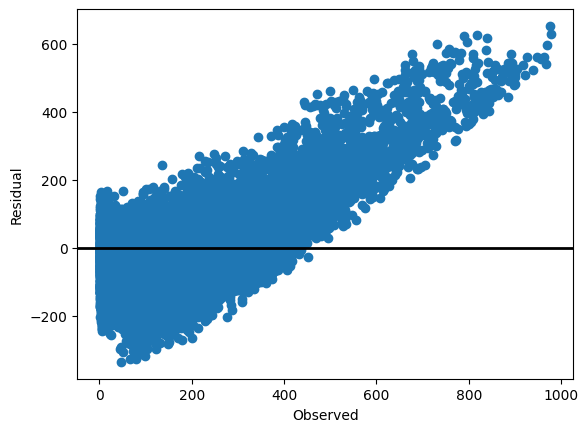

In [ ]:
from sklearn.model_selection import cross_val_predict
# y_pred is a predicted target
y_pred = cross_val_predict(lin_reg, X_train, y_train, cv=10)

# print the size of true target and predicted target
print(y_pred.shape)
print(y_train.shape)

# compute residual
residual = y_train - y_pred

# plot scatter between residuals and observed target values
plt.subplot(1,1,1)
plt.scatter(y_train, residual)
plt.axhline(lw=2,color='black')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

((array([-3.8539071 , -3.63114037, -3.50894885, ...,  3.50894885,
          3.63114037,  3.8539071 ]),
  array([-335.92842543, -327.19309364, -325.93517225, ...,  625.41844807,
          628.54688349,  653.38115068])),
 (134.7749131492267, 0.007532479186516836, 0.960607056420466))

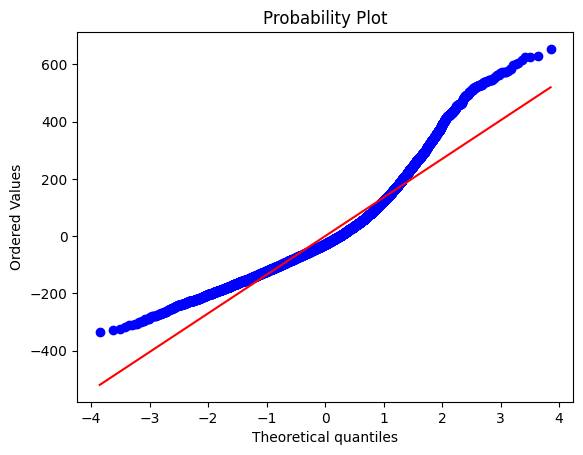

In [ ]:
stats.probplot(residual, dist='norm', plot=plt)

The plot clearly violates the homoscedasticity assumption, which is about residuals being random and not following any pattern.

* Plot the cross-validation scores
* Use the cross_val_score() function available as part of the model_selection module.
 cross_val_score() returns array of scores of the model for each run of the cross validation. Its key components are as:
  * estimator: the learned model
  * X : the data to fit
  * y : the target variable
  * scoring : an specific score as string
  * cv : k-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
estimator = lin_reg
X = X_train
y = y_train
cv=10
r2_scores = cross_val_score(estimator, X, y, cv=10)
mse_scores = cross_val_score(estimator, X, y, cv=10, scoring='neg_mean_squared_error')

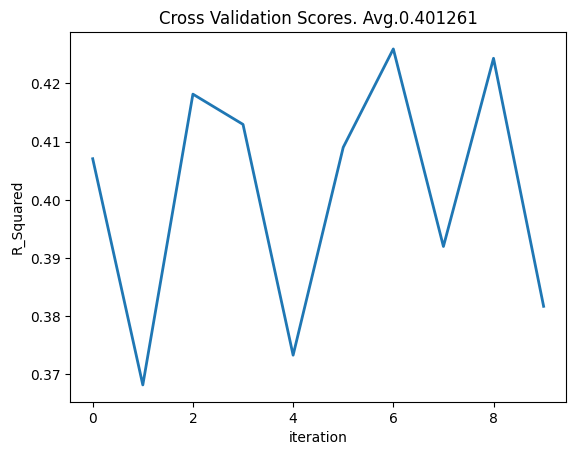

In [ ]:
plt.subplot()
# lw: line width
plt.plot([i for i in range(cv)], r2_scores, lw=2)
plt.xlabel('iteration')
plt.ylabel('R_Squared')
plt.title('Cross Validation Scores. Avg.%f' % np.mean(r2_scores))
plt.show()

* The r-squared is 0.40 on an average for 10-fold cross validation.
* This points to the fact that the predictor is only able to explain 40% of the variance in the target variable.

* Print R-squared and MSE for 10-fold cross validation

In [ ]:
print('R_Squared: ', r2_scores)
print("MSE: ", mse_scores)

R_Squared:  [0.40706106 0.36818366 0.41816151 0.41296268 0.3732965  0.40901345
 0.42593532 0.3919805  0.4243251  0.38169448]
MSE:  [-19410.84292794 -21017.61442937 -20281.96474394 -20225.307923
 -20672.53179744 -18595.97959913 -19411.54644058 -19828.0932691
 -18737.08804805 -18542.17886349]


# Model evaluation

The linear regression model was prepared and evaluated in the training phase needs to be checked for its performance on a completely un-seen dataset, the testing dataset.

As mentioned before, we used the train_test_split() function to keep a dataset specifically for testing purposes.

* Train the linear regression model on the training data

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

* Use test data on the learned regression line to predict target values
* Use the predict() function of the LinearRegression and
compare results
* Calculate the residuals and use them to prepare the residual plot, similar to the one we created during training step

In [ ]:
y_pred = lin_reg.predict(X_test)

residuals = y_test - y_pred

In [ ]:
from sklearn import metrics

r2_score = lin_reg.score(X_test, y_test)
print("R_squared for test data: ", r2_score)
print("MSE for test data: %.2f" %metrics.mean_squared_error(y_test, y_pred))

R_squared for test data:  0.38962234108175664
MSE for test data: 20356.45


Text(0.5, 1.0, 'Residual Plot with R_Squared=0.389622')

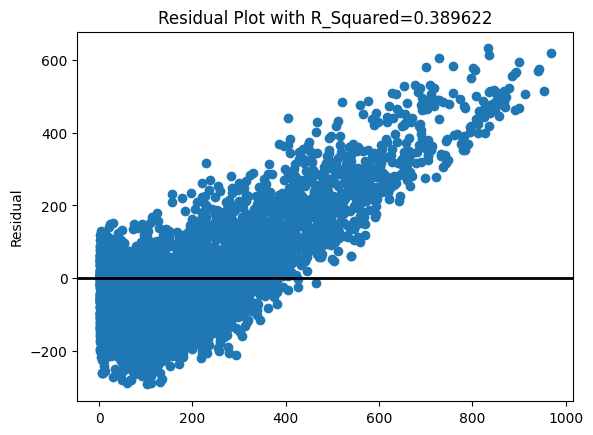

In [ ]:
plt.subplot()
plt.scatter(y_test, residuals)
plt.axhline(lw=2, color='black')
plt.ylabel('Residual')
plt.title("Residual Plot with R_Squared=%f" % np.mean(r2_score))

((array([-3.8539071 , -3.63114037, -3.50894885, ...,  3.50894885,
          3.63114037,  3.8539071 ]),
  array([-335.92842543, -327.19309364, -325.93517225, ...,  625.41844807,
          628.54688349,  653.38115068])),
 (134.7749131492267, 0.007532479186516836, 0.960607056420466))

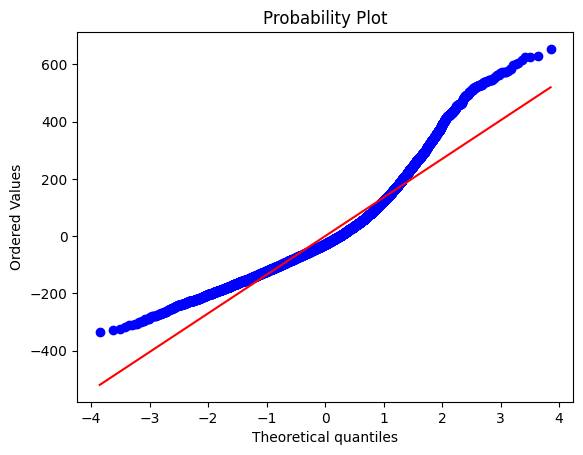

In [ ]:
stats.probplot(residual, dist='norm', plot=plt)

* The linear regression model is unable to model the data.
* The model is performing equally on both training
and testing datasets.
* We would need to model this data using methods that can model non-linear relationships.

# Decision Tree Regressor



Decision trees are supervised learning algorithms used for both regression and classification problems. They are simple yet powerful in modeling non-linear relationships. The interpretability of decision trees makes them even more lucrative, as we can visualize the rules it has inferred from the data.

* Define DecisionTreeRegressor from sklearn' tree model
* Its key components:
  * **criterion**: measures the quality of a split
  * **min_samples_split**: The minimum number of samples required to split an internal node
  * **max_depth**: the maximum depth of the tree.
  * **min_samples_leaf**: the minimum number of samples required to be at a leaf node
  * **max_leaf_nodes**: grows a tree with max_leaf_nodes in best-first fashion
* Fit the default Decision tree Regressor on the training data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

* Evaluate the performance of Decision tree Regressor on training and test data.

In [ ]:
train_r2 = dtr.score(X_train, y_train)
test_r2 = dtr.score(X_test, y_test)

print("R-squared fro Test data: ", test_r2)
print("R-squared for Training data: ", train_r2)

R-squared fro Test data:  0.5548118087750846
R-squared for Training data:  0.5712918885222464


# Plot the learned model

Decision trees have an added advantage of being interpretable.

Graphviz is a graph visualization software for representing structural information as diagrams of abstract graphs and networks.

pydotplus is an interface to Graphviz.

IPython (interactive Python) is an interactive command-line terminal for Python. It will provide an IPython terminal and web-based (Notebook) platform for Python computing.

* Visualize the model using Graphviz and pydot libraries
* export_graphviz generates a GraphViz representation (a dot data format) of the decision tree and exports the decision tree to GraphViz
* graph_from_dot_data: generates graph
* write_pdf & write_png: creates the file
* Display the image of tree using Image () from IPython.display

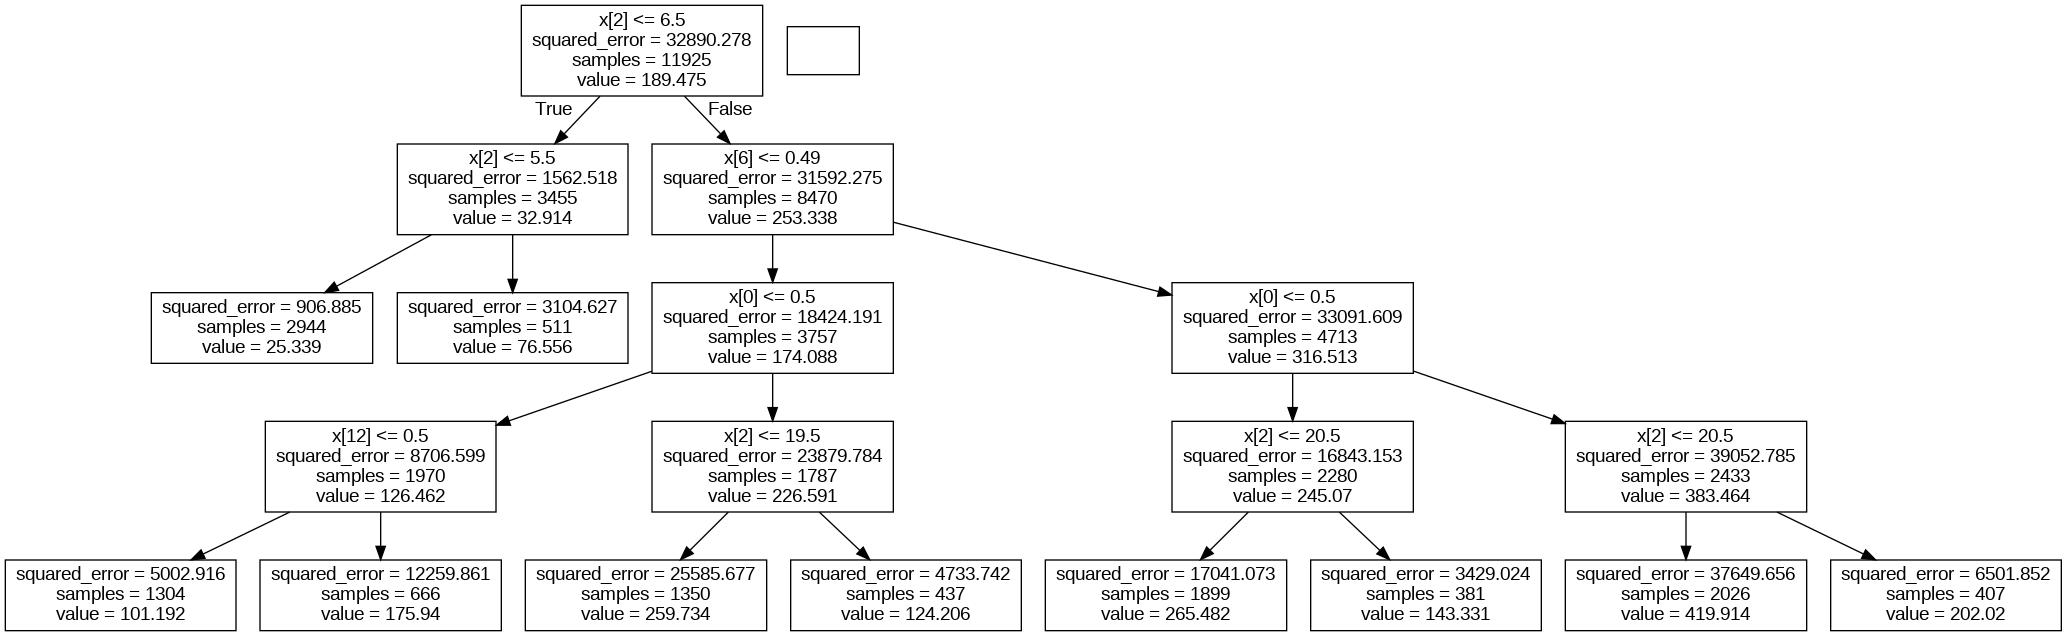

In [ ]:
import pydotplus
from sklearn import tree

dot_data = tree.export_graphviz(dtr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('bikeshare_decisontree.pdf')
graph.write_png('bikeshare_decisiontree.png')

from IPython.display import Image
Image(graph.create_png())

# GridSearch for fine tuning hyperparameters

The training process for decision trees is a bit different as compared to linear regression.
In the case of decision trees, we have quite a handful of hyperparameters to tune.

The grid search of hyperparameters with k-fold cross validation is an iterative process wrapped, optimized, and standardized by GridSearchCV() function.

The GridSearchCV() function will in turn search in this defined list of possible values to arrive at the
best one value.





* sklearn provides a utility to grid search the hyperparameters while cross validating the model using the GridSearchCV() method from model_selection module.
* The GridSearchCV() takes the Regression/Classifier as input parameter along with a dictionary of hyperparameters, number of cross validations require.
* The **dictionary** provides a list of feasible values for each of the hyperparameters that we want to fine-tune.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters
param_grid = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [ ]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [ ]:
grid_cv_dtr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

# Best hyperparameters selection



* The **best_score_** attribute helps us get the best cross validation score our Decision Tree Regressor could achieve.
* We can view the hyperparameters for the model that generates the **best score** using **best_params_**.
* We can view the **detailed information** of each iteration of GridSearchCV() using the **cv_results_** attribute.

In [ ]:
print('R_squared: ', grid_cv_dtr.best_score_)
print('Best Hyperparameter: \n', grid_cv_dtr.best_params_)

R_squared:  0.8435163907899786
Best Hyperparameter: 
 {'criterion': 'squared_error', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 40}


* Try to understand the learning/model fitting results across different settings of this model fitting.
* To get to different models prepared during our grid search, use the **cv_results_** attribute of our GridSearchCV object.

The **cv_results_** attribute is a numpy array that we can easily convert to a pandas dataframe.

* *head(n)* returns the first n rows of a dataframe.

In [ ]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014941,0.004844,0.003332,0.000090,squared_error,2,5,20,10,"{'criterion': 'squared_error', 'max_depth': 2,...",0.399584,0.424931,0.406445,0.42288,0.416565,0.414081,0.009693,181
1,0.012238,0.000442,0.003634,0.001162,squared_error,2,5,20,20,"{'criterion': 'squared_error', 'max_depth': 2,...",0.399584,0.424931,0.406445,0.42288,0.416565,0.414081,0.009693,181
2,0.015774,0.005603,0.004905,0.002661,squared_error,2,5,20,40,"{'criterion': 'squared_error', 'max_depth': 2,...",0.399584,0.424931,0.406445,0.42288,0.416565,0.414081,0.009693,181
3,0.012564,0.000571,0.003584,0.000087,squared_error,2,5,40,10,"{'criterion': 'squared_error', 'max_depth': 2,...",0.399584,0.424931,0.406445,0.42288,0.416565,0.414081,0.009693,181
4,0.012409,0.000227,0.003303,0.000249,squared_error,2,5,40,20,"{'criterion': 'squared_error', 'max_depth': 2,...",0.399584,0.424931,0.406445,0.42288,0.416565,0.414081,0.009693,181


It important to understand that grid search with cross validation was optimizing on finding the best set of hyperparameters that can help prepare a generalizable Decision Tree Regressor.

* Use seaborn to plot the impact of depth of the tree on the overall score along with number of leaf nodes.
* Use the same dataframe we prepared using cv_results_ attribute of GridSearchCV.

The key components of point plot are as:
* **data**: specifies the pandas DataFrame we want to use.
* **x**: represents the categorical column label
* **y**: represents the column that we want to aggregate data for
*  **hue**: allows you to split a categorical variable into additional groups, (splitting the variable into relevant groups).


Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')

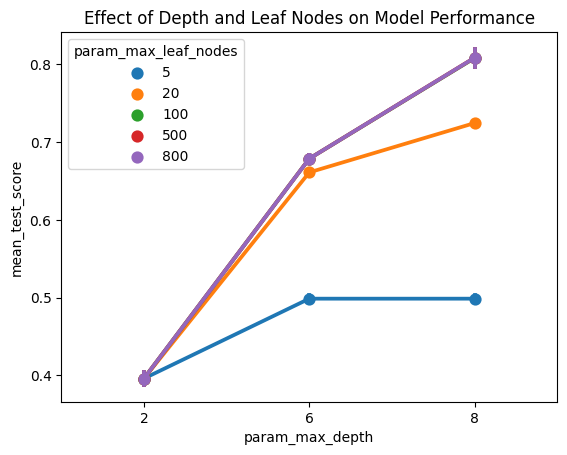

In [ ]:
sns.pointplot(data=df, y='mean_test_score',x='param_max_depth', hue='param_max_leaf_nodes')
plt.title("Effect of Depth and Leaf Nodes on Model Performance")

* The output shows a sudden improvement in score as depth increases from 2 to 6 while a gradual improvement as we reach 8 from 6.
* The impact of number of leaf nodes is rather interesting.
* The difference in scores between 100 and 800 leaf nodes is strikingly not much.

# Setting the model for Testing

* Predict the output values for the test dataset using the best estimator achieved during training phase.

**best_estimator_** attribute of GridSearch returns the model with best perfromance by 10-fold cross validation.


In [ ]:
best_dtr_model = grid_cv_dtr.best_estimator_
y_pred = best_dtr_model.predict(X_train)
# Residual is the difference between the observed and the predicted variables
residuals = y_train - y_pred

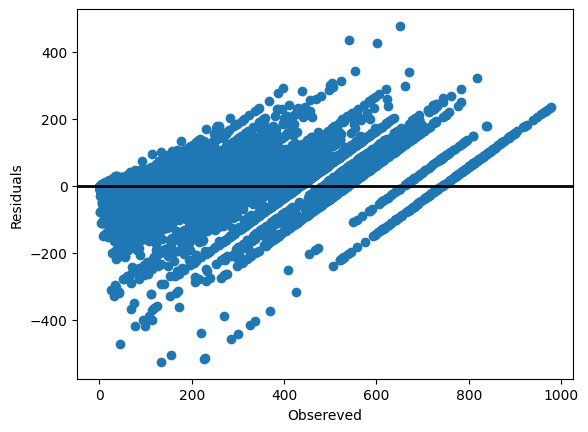

In [ ]:
# plot scatter between residuals and observed target values
fig, ax = plt.subplots()
ax.scatter(y_train, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Obsereved')
ax.set_ylabel("Residuals")
plt.show()

* Report evaluation metrics by using 10-fold cross validation on training data

In [ ]:
r2_scores = cross_val_score(best_dtr_model, X_train, y_train, cv=10)
mse_scores = cross_val_score(best_dtr_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [ ]:
print('avg R_squared: ', np.mean(r2_scores))
print('MSE: ', np.mean(mse_scores))

avg R_squared:  0.8415306004983819
MSE:  -5201.020677917187


The R-squared demonstrates that the performance is quite comparable to our training performance. We can conclude by saying Decision Tree Regressor was better at forecasting bike demand as compared to linear regression.

* Evaluate the best tree model on training and test data for r2 square score

In [ ]:
train_r2 = best_dtr_model.score(X_train, y_train)
test_r2 = best_dtr_model.score(X_test, y_test)
print("R2 square of training data: ", train_r2)
print("R2 square of test data:", test_r2)

R2 square of training data:  0.860715624412312
R2 square of test data: 0.8418018712661293
